In [1]:
import pandas as pd

In [2]:
df_nocr = pd.read_csv('./SportsStats/noc_regions.csv')
df_atev = pd.read_csv('./SportsStats/athlete_events.csv')

### First I am exploring noc_regions.csv:

In [3]:
df_nocr.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


Three regions have null values:

In [4]:
df_nocr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


The null values belong to NOC = {ROT, TUV, UNK}

In [5]:
df_nocr[df_nocr.region.isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


Some countries have more than one NOC:

In [6]:
df_nocr[df_nocr.duplicated(subset='region', keep=False)].groupby(['region']).count()

,NOC,notes
region,,
Australia,2,1
Canada,2,1
China,2,1
Czech Republic,3,1
Germany,4,0
Greece,2,1
Malaysia,3,1
Russia,3,0
Serbia,3,2


Here is some NOC codes that represent same countries:

In [7]:
df_nocr[df_nocr.duplicated(subset='region', keep=False)].sort_values('region')

,NOC,region,notes
7,ANZ,Australia,Australasia
12,AUS,Australia,NaN
36,CAN,Canada,NaN
147,NFL,Canada,Newfoundland
41,CHN,China,NaN
88,HKG,China,Hong Kong
54,CZE,Czech Republic,NaN
197,TCH,Czech Republic,NaN
26,BOH,Czech Republic,Bohemia
70,FRG,Germany,NaN


### Here I am exploring the athlete_events.csv

In [8]:
df_atev.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [9]:
df_atev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


There are missing values in these columns: Age, Height, and Weight. The null values in Medal column represent that the athlete did not gain a medal for the game.
Here is all columns that we have:

In [10]:
df_atev.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In this dataset, the youngest athlete is 10 and the oldest one is 97 years old.

In [11]:
df_atev.Age.agg(['min', 'max'])

min    10.0
max    97.0
Name: Age, dtype: float64

I am interested to know the number of atheletes in different age range:

In [12]:
bins = pd.cut(df_atev['Age'], [i for i in range(5,101,5)])
df_atev.groupby(bins)['Age'].count()

Age
(5, 10]           1
(10, 15]       3279
(15, 20]      44281
(20, 25]     103280
(25, 30]      68694
(30, 35]      25723
(35, 40]       8683
(40, 45]       3879
(45, 50]       1884
(50, 55]        909
(55, 60]        459
(60, 65]        300
(65, 70]        169
(70, 75]         81
(75, 80]         12
(80, 85]          3
(85, 90]          3
(90, 95]          0
(95, 100]         2
Name: Age, dtype: int64

Seniors athletes -over than 65 years old- are competing in 5 sports:

In [13]:
df_senior = df_atev[df_atev.Age>65]
arr_sport = pd.unique(df_senior.Sport)
arr_sport

array(['Art Competitions', 'Equestrianism', 'Archery', 'Sailing',
       'Shooting'], dtype=object)

Checking the minimum and maximum year of these sports, I found out some of them are not part of olympic games anymore:

In [14]:
df_senior[df_senior.Sport.isin(arr_sport)].groupby('Sport').Year.agg(['min','max'])

,min,max
Sport,,
Archery,1904,1904
Art Competitions,1912,1948
Equestrianism,1900,2012
Sailing,1900,1988
Shooting,1920,1976


There are totally 66 different sports in the dataset:

In [15]:
len(pd.unique(df_atev.Sport))

66

In [16]:
# setting pandas display options
pd.set_option('display.max_rows', 250)
#
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

I check the minimum and maximum of year and athelete's age base on each sport group to have a better understanding of the dataset:

In [17]:
df_atev.groupby(['Sport'])['Year', 'Age'].agg(['min', 'max','count'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Year                Age             
                            min   max  count   min   max  count
Sport                                                          
Aeronautics                1936  1936      1  26.0  26.0      1
Alpine Skiing              1936  2014   8829  14.0  55.0   8751
Alpinism                   1924  1936     25  22.0  57.0     16
Archery                    1900  2016   2334  14.0  71.0   2254
Art Competitions           1912  1948   3578  14.0  97.0   3071
Athletics                  1896  2016  38624  12.0  52.0  37507
Badminton                  1992  2016   1457  16.0  44.0   1457
Baseball                   1992  2008    894  16.0  44.0    893
Basketball                 1936  2016   4536  16.0  40.0   4350
Basque Pelota              1900  1900      2  26.0  26.0      2
Beach Volleyball           1996  2016    564  18.0  41.0    564
Biathlon                   1960  2014   4893  17.0  45.0   4892
Bobsleigh                  1924  2014   3058  15.0  54.0   2986
Boxing                     1904  2016   6047  15.0  41.0   5729
Canoeing                   1936  2016   6171  15.0  48.0   6136
Cricket                    1900  1900     24  21.0  44.0     18
Croquet                    1900  1900     19  15.0  58.0     15
Cross Country Skiing       1924  2014   9133  15.0  49.0   9098
Curling                    1924  2014    463  17.0  58.0    463
Cycling                    1896  2016  10859  14.0  49.0  10181
Diving                     1904  2016   2842  12.0  51.0   2721
Equestrianism              1900  2016   6344  16.0  72.0   6151
Fencing                    1896  2016  10735  14.0  63.0  10020
Figure Skating             1908  2014   2298  11.0  52.0   2274
Football                   1900  2016   6745  15.0  40.0   6370
Freestyle Skiing           1992  2014    937  13.0  44.0    937
Golf                       1900  2016    247  15.0  50.0    235
Gymnastics                 1896  2016  26707  10.0  49.0  25528
Handball                   1936  2016   3665  14.0  43.0   3633
Hockey                     1908  2016   5417  15.0  44.0   5213
Ice Hockey                 1920  2014   5516  15.0  48.0   5487
Jeu De Paume               1908  1908     11  19.0  43.0     11
Judo                       1964  2016   3801  14.0  43.0   3763
Lacrosse                   1904  1908     60  14.0  37.0     36
Luge                       1964  2014   1479  15.0  53.0   1477
Military Ski Patrol        1924  1924     24  20.0  32.0     19
Modern Pentathlon          1912  2016   1677  15.0  53.0   1624
Motorboating               1908  1908     17  26.0  54.0     15
Nordic Combined            1924  2014   1344  15.0  39.0   1335
Polo                       1900  1936     95  21.0  53.0     90
Racquets                   1908  1908     12  19.0  45.0     12
Rhythmic Gymnastics        1984  2016    658  13.0  30.0    658
Roque                      1904  1904      4  37.0  64.0      3
Rowing                     1900  2016  10595  11.0  60.0  10069
Rugby                      1900  1924    162  18.0  39.0    114
Rugby Sevens               2016  2016    299  18.0  36.0    299
Sailing                    1900  2016   6586  13.0  71.0   6301
Shooting                   1896  2016  11448  15.0  72.0  10627
Short Track Speed Skating  1992  2014   1534  13.0  35.0   1534
Skeleton                   1928  2014    199  18.0  53.0    197
Ski Jumping                1924  2014   2401  14.0  43.0   2387
Snowboarding               1998  2014    936  14.0  40.0    936
Softball                   1996  2008    478  17.0  41.0    478
Speed Skating              1924  2014   5613  13.0  52.0   5594
Swimming                   1896  2016  23195  11.0  46.0  22671
Synchronized Swimming      1984  2016    909  15.0  40.0    905
Table Tennis               1988  2016   1955  15.0  54.0   1948
Taekwondo                  2000  2016    606  16.0  37.0    606
Tennis                     1896  2016   2862  13.0  47.0   2738
Trampolining               2000  2016    152  18.0  39.0   

Sport named "Aeronautics" is in olympic games only once in 1936. and there is only one athlete for this sport.

In [18]:
df_atev[df_atev.Sport=='Aeronautics']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214105,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold


There are 51 different sports which are played after 2000:

In [19]:
len(pd.unique(df_atev[df_atev.Year >= 2000].Sport))

51

Here is the list of all sports that are played after 2000 in olympics:

In [20]:
sports2000 =set(pd.unique(df_atev[df_atev.Year >= 2000].Sport))
sports2000

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach Volleyball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoeing',
 'Cross Country Skiing',
 'Curling',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Freestyle Skiing',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rhythmic Gymnastics',
 'Rowing',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboarding',
 'Softball',
 'Speed Skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

It means (66 - 51 = 15) 15 sports have not been played after 2000 in olympics. 
Here is the list of these Sports:

In [21]:
allSports = set(pd.unique(df_atev.Sport))
removedSports = allSports - sports2000
removedSports

{'Aeronautics',
 'Alpinism',
 'Art Competitions',
 'Basque Pelota',
 'Cricket',
 'Croquet',
 'Jeu De Paume',
 'Lacrosse',
 'Military Ski Patrol',
 'Motorboating',
 'Polo',
 'Racquets',
 'Roque',
 'Rugby',
 'Tug-Of-War'}

I removed sport records that are not part of olympics anymore in a new dataframe:

In [22]:
df_atev2000 = df_atev[df_atev.Sport.isin(sports2000)]
df_atev2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266912 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      266912 non-null  int64  
 1   Name    266912 non-null  object 
 2   Sex     266912 non-null  object 
 3   Age     258093 non-null  float64
 4   Height  210788 non-null  float64
 5   Weight  208096 non-null  float64
 6   Team    266912 non-null  object 
 7   NOC     266912 non-null  object 
 8   Games   266912 non-null  object 
 9   Year    266912 non-null  int64  
 10  Season  266912 non-null  object 
 11  City    266912 non-null  object 
 12  Sport   266912 non-null  object 
 13  Event   266912 non-null  object 
 14  Medal   39128 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.6+ MB


Here we can see the number of athletes in each age group:

In [23]:
bins = pd.cut(df_atev2000['Age'], [i for i in range(5,101,5)])
df_atev2000.groupby(bins)['Age'].count()

Age
(5, 10]           1
(10, 15]       3272
(15, 20]      44248
(20, 25]     103019
(25, 30]      68328
(30, 35]      25322
(35, 40]       8235
(40, 45]       3345
(45, 50]       1412
(50, 55]        574
(55, 60]        231
(60, 65]         73
(65, 70]         19
(70, 75]         14
(75, 80]          0
(80, 85]          0
(85, 90]          0
(90, 95]          0
(95, 100]         0
Name: Age, dtype: int64

Age range in each sport, and the duration of sport -first year and last year- is showed here:

In [24]:
df_atev2000.groupby(['Sport'])['Year', 'Age'].agg(['min', 'max','count'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Year                Age             
                            min   max  count   min   max  count
Sport                                                          
Alpine Skiing              1936  2014   8829  14.0  55.0   8751
Archery                    1900  2016   2334  14.0  71.0   2254
Athletics                  1896  2016  38624  12.0  52.0  37507
Badminton                  1992  2016   1457  16.0  44.0   1457
Baseball                   1992  2008    894  16.0  44.0    893
Basketball                 1936  2016   4536  16.0  40.0   4350
Beach Volleyball           1996  2016    564  18.0  41.0    564
Biathlon                   1960  2014   4893  17.0  45.0   4892
Bobsleigh                  1924  2014   3058  15.0  54.0   2986
Boxing                     1904  2016   6047  15.0  41.0   5729
Canoeing                   1936  2016   6171  15.0  48.0   6136
Cross Country Skiing       1924  2014   9133  15.0  49.0   9098
Curling                    1924  2014    463  17.0  58.0    463
Cycling                    1896  2016  10859  14.0  49.0  10181
Diving                     1904  2016   2842  12.0  51.0   2721
Equestrianism              1900  2016   6344  16.0  72.0   6151
Fencing                    1896  2016  10735  14.0  63.0  10020
Figure Skating             1908  2014   2298  11.0  52.0   2274
Football                   1900  2016   6745  15.0  40.0   6370
Freestyle Skiing           1992  2014    937  13.0  44.0    937
Golf                       1900  2016    247  15.0  50.0    235
Gymnastics                 1896  2016  26707  10.0  49.0  25528
Handball                   1936  2016   3665  14.0  43.0   3633
Hockey                     1908  2016   5417  15.0  44.0   5213
Ice Hockey                 1920  2014   5516  15.0  48.0   5487
Judo                       1964  2016   3801  14.0  43.0   3763
Luge                       1964  2014   1479  15.0  53.0   1477
Modern Pentathlon          1912  2016   1677  15.0  53.0   1624
Nordic Combined            1924  2014   1344  15.0  39.0   1335
Rhythmic Gymnastics        1984  2016    658  13.0  30.0    658
Rowing                     1900  2016  10595  11.0  60.0  10069
Rugby Sevens               2016  2016    299  18.0  36.0    299
Sailing                    1900  2016   6586  13.0  71.0   6301
Shooting                   1896  2016  11448  15.0  72.0  10627
Short Track Speed Skating  1992  2014   1534  13.0  35.0   1534
Skeleton                   1928  2014    199  18.0  53.0    197
Ski Jumping                1924  2014   2401  14.0  43.0   2387
Snowboarding               1998  2014    936  14.0  40.0    936
Softball                   1996  2008    478  17.0  41.0    478
Speed Skating              1924  2014   5613  13.0  52.0   5594
Swimming                   1896  2016  23195  11.0  46.0  22671
Synchronized Swimming      1984  2016    909  15.0  40.0    905
Table Tennis               1988  2016   1955  15.0  54.0   1948
Taekwondo                  2000  2016    606  16.0  37.0    606
Tennis                     1896  2016   2862  13.0  47.0   2738
Trampolining               2000  2016    152  18.0  39.0    152
Triathlon                  2000  2016    529  18.0  42.0    529
Volleyball                 1964  2016   3404  15.0  41.0   3395
Water Polo                 1900  2016   3846  14.0  45.0   3646
Weightlifting              1896  2016   3937  15.0  45.0   3731
Wrestling                  1896  2016   7154  15.0  50.0   6663

# Visualizations

In [28]:
import matplotlib.pyplot as plt

In [31]:
plt.style.use('fivethirtyeight')

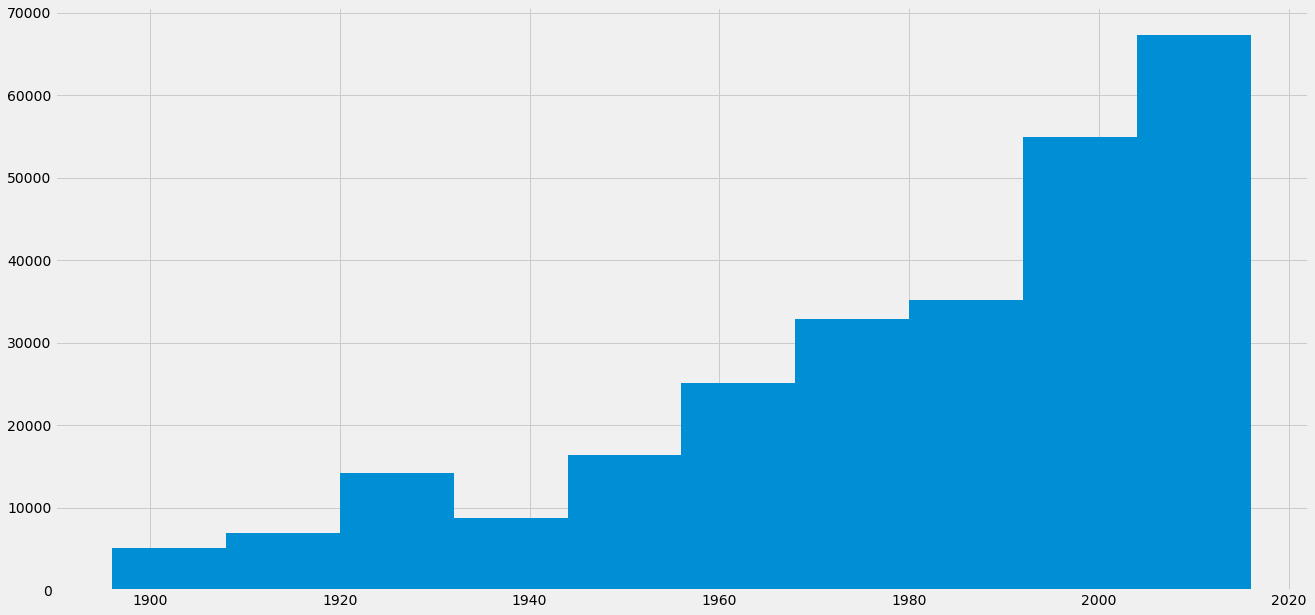

In [32]:
plt.figure(figsize=(20,10))
df_atev2000.Year.hist()

In [35]:
import statistics as stt

ValueError: x and y must have same first dimension, but have shapes (266912,) and (1,)

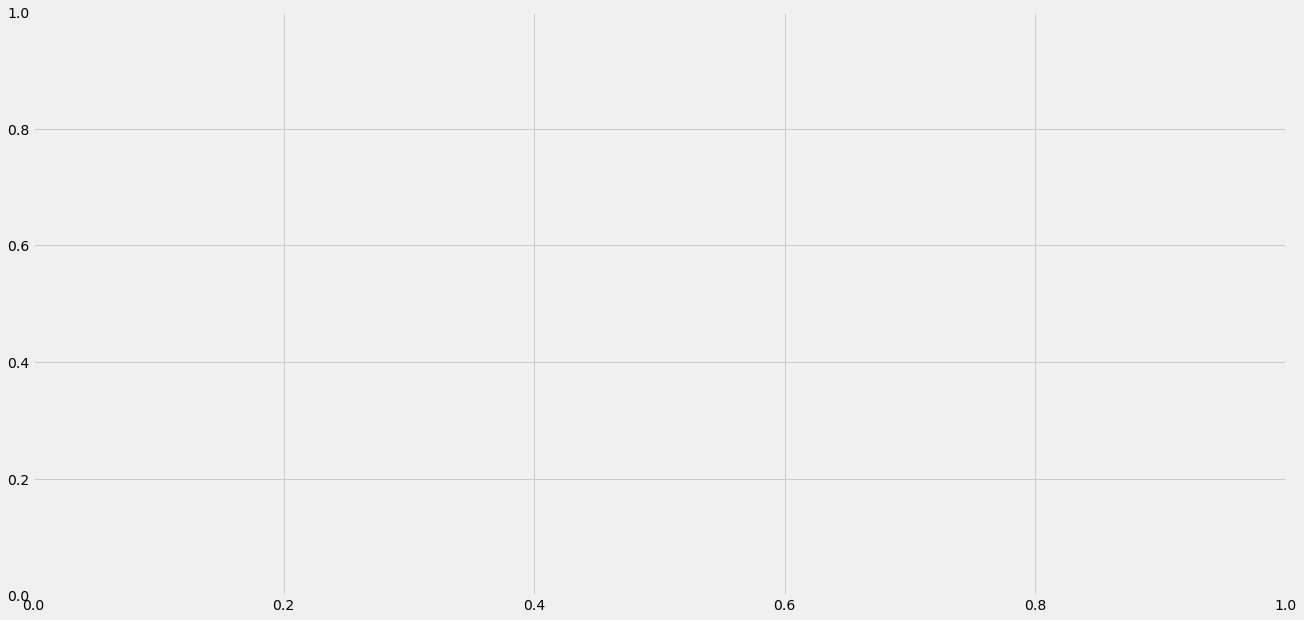

In [38]:
plt.figure(figsize=(20,10))
plt.plot(df_atev2000.Year, stt.mode(df_atev2000.Age))